In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import spacy
import textacy
import numpy as np
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 8)
plt.style.use('ggplot')

In [2]:
nlp = spacy.load('en')

In [3]:
db = pd.read_hdf('james.hdf', 'james')

In [4]:
db['length'] = db.text_cleaned.apply(len)

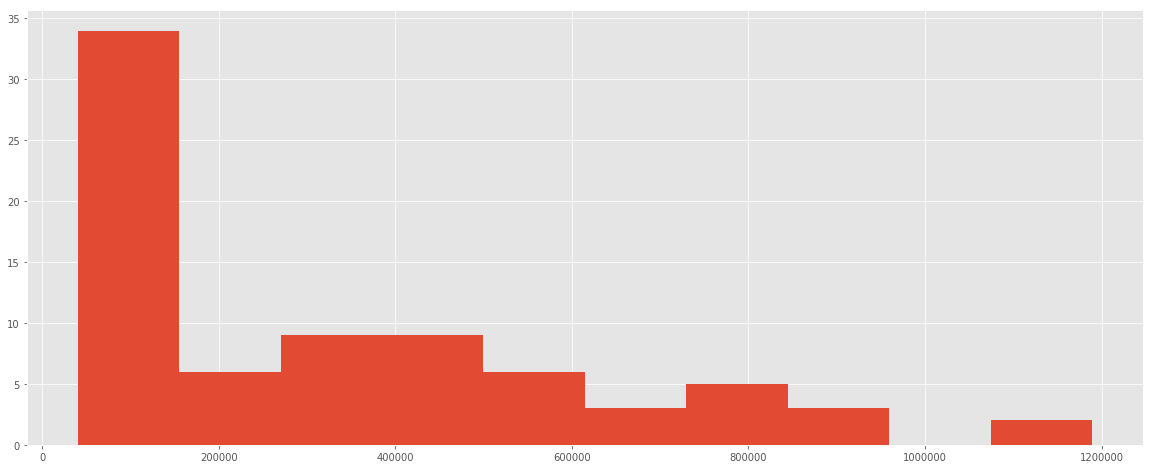

In [5]:
db['length'].hist()

In [6]:
longWorks = db.loc[db['length'] > 200000]

In [7]:
longTexts = longWorks.text_cleaned.tolist()

In [8]:
longMeta = longWorks[['id', 'subjects', 'title', 'local_url', 'pub_date']]

In [9]:
metaList = []
for i, row in longMeta.iterrows(): 
    metaList.append(row.to_dict())

In [10]:
len(metaList)

40

In [11]:
james = textacy.corpus.Corpus('en', longTexts, metadatas=metaList)

In [12]:
james

Corpus(40 docs; 5093464 tokens)

In [14]:
len(james.docs)

40

In [15]:
rh = james.docs[0]

In [16]:
rh.metadata['title']

'Roderick Hudson'

In [45]:
def sentHist(doc): 
    s = pd.Series([len(sent) for sent in doc.sents])
    return s.hist()

def sentStats(doc): 
    s = pd.Series([len(sent) for sent in doc.sents])
    return s.describe()

In [46]:
# Make histogram bins for all sentences, first. 
allLengths = []
for doc in james.docs: 
    for length in [len(sent) for sent in doc.sents]: 
        allLengths.append(length)
hist = np.histogram(allLengths)
bins = hist[1]

In [49]:
# Now do histograms for individual novels using these bins.  
hists = {doc.metadata['title']: np.histogram([len(sent) for sent in doc.sents], bins=bins)[0]
         for doc in james.docs}

In [50]:
df = pd.DataFrame(hists)

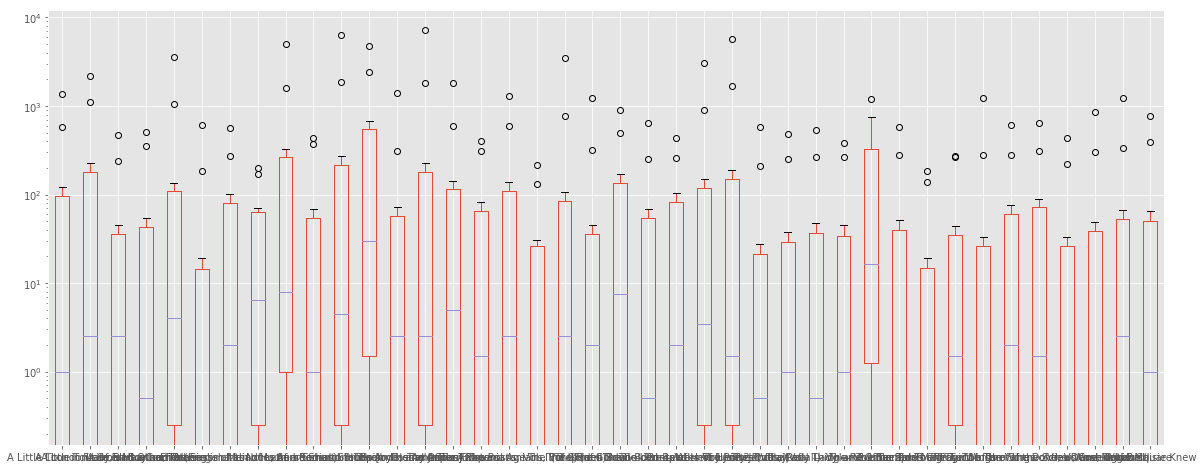

In [52]:
df.plot(kind='box', logy=True)

In [50]:
# Find longest sentence
allSents = []
for doc in james:
    for sent in doc.sents:
        allSents.append((len(sent), sent, doc.metadata['title']))

In [51]:
allSents = sorted(allSents, key=lambda x: x[0])

In [52]:
len(allSents)

191536

In [68]:
allSents[-12]

(245, None the less do I
 regain it as a part of my current vision that Frau Stromberg, who was
 young and fair, wrote tragedies as well as made pancakes--which were
 served to each consumer double, a thick confiture within being the
 reason of this luxuriance, and being also a note beyond our experience
 in the Bonn-Gasse; and that with the printed five acts of a certain
 "Cleopatra" before me, read aloud in the first instance to her young
 inmates and by my brother passed on to me, I lost myself in the view of
 I scarce knew what old-world Germanic grace, positively, or little
 court-city practice of the theatre: these things so lived in the small
 thick pamphlet, "grey paper with blunt type" and bristling, to my
 discomfiture, with descriptive stage directions, vast dense bracketed
 tracts, gothic enough in all conscience, as to which I could already
 begin to wonder whether such reinforcements of presentation proved more
 for or against the true expressional essence of the matter; 

In [71]:
import pandas as pd
from matplotlib import pyplot as plt
import spacy
import textacy
import numpy as np
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 8)
plt.style.use('ggplot')
from glob import glob

In [86]:
rawDocs = sorted(glob('text/*'))
metadata = [{'filename': fn} for fn in rawDocs]

In [87]:
texts = [open(f).read() for f in rawDocs]

In [88]:
docs = textacy.corpus.Corpus('en', texts, metadatas=metadata) 

In [89]:
allSents = []
for doc in docs:
    for sent in doc.sents:
        allSents.append((sent, len(sent), doc.metadata['filename']))

In [90]:
len(allSents) 

139481

In [91]:
sortedSents = sorted(allSents, key=lambda x: x[1])

In [95]:
sortedSents[-4]

(That
 concentrated passage between the two men while the author of their situation
 was still unburied would of course always hover to memory's eye like a votive
 object in the rich gloom of a chapel; but it was now disconnected, attached to
 its hook once for all, its whole meaning converted with such small delay into
 working, playing force and multiplied tasteable fruit. [244]
   Quiet as he passed for keeping himself, by the impression I have noted, how
 could Gray have felt more plunged in history, how could he by his own sense
 more have waked up to it each morning and gone to bed with it each night, sat
 down to it whenever he did sit down, which was never for long, whether at a
 meal, at a book, at a letter, or at the wasted endeavour to become, by way of
 a change, really aware of his consciousness, than through positively missing
 as he did the hint of anything in particular to do? -- missing and missing it
 all the while and yet at no hour paying the least of the penalties 